In [2]:
pip install pandas matplotlib seaborn scikit-learn xgboost imbalanced-learn

In [3]:
import pandas as pd

URL = "https://raw.githubusercontent.com/ajtoriani/Telecom-X/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(URL)

print("Dimensão inicial:", df.shape)
df.head()

Dimensão inicial: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Tratamento Básico dos Dados

In [5]:
# Verificando tipos de dados
df.info()

# Remover colunas irrelevantes ou duplicadas (se necessário)
df = df.drop(columns=["customerID"], errors='ignore')

# Corrigir tipo da variável alvo (churn) e remover nulos
df = df.dropna(subset=['Churn'])  # se houver nulos

# Garantir que o alvo está binário (0 ou 1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# Análise Exploratória (EDA)

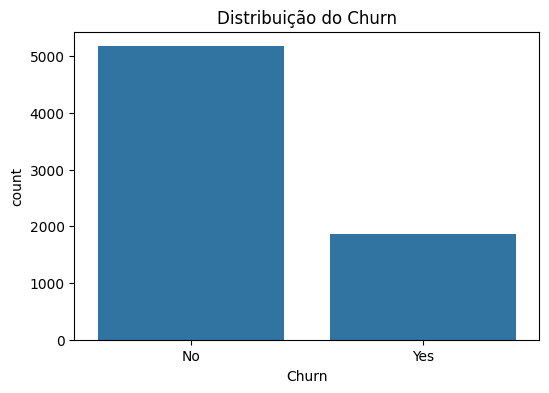

ValueError: Could not interpret value `account_contract` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição do churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Distribuição do Churn")
plt.show()

# Distribuição por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="account_contract", hue="Churn")
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=45)
plt.show()

# Distribuição por tipo de internet
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="internet_type", hue="Churn")
plt.title("Churn por Tipo de Internet")
plt.xticks(rotation=45)
plt.show()

# Boxplot: Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="monthly_charges")
plt.title("Monthly Charges por Churn")
plt.show()

# Pré-processamento e Codificação

In [9]:
import pandas as pd

# Carregar dados
URL = "https://raw.githubusercontent.com/ajtoriani/Telecom-X/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(URL)

# Normalizar colunas que são dicionários
from pandas import json_normalize

# Expandir colunas com dicionários
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenar tudo em um único DataFrame
df = pd.concat([df_customer, df_phone, df_internet, df_account, df[['Churn']]], axis=1)

# Conferir resultado
print("Dimensão após normalização:", df.shape)
df.head()


Dimensão após normalização: (7267, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [11]:
# Verificar valores nulos e tratar se necessário
df = df.dropna()

# Variáveis preditoras e alvo
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Codificação de variáveis categóricas
X = pd.get_dummies(X)

# Separação treino/teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Treinamento dos Modelos

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Regressão Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Avaliação dos Modelos

In [35]:
import pandas as pd

# Carregando os dados
URL = "https://raw.githubusercontent.com/ajtoriani/Telecom-X/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(URL)

# Verificando as colunas com dicionários
dict_cols = ['customer', 'phone', 'internet', 'account']

# Expandindo as colunas dicionário
for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

print("Colunas após expansão:", df.columns.tolist())

print(df["Churn"].value_counts(dropna=False))

# Remover registros com churn vazio ou nulo
df = df[df["Churn"].isin(["Yes", "No"])].copy()

# Verificar novamente
print(df["Churn"].value_counts())



from sklearn.metrics import classification_report, roc_auc_score

# Converter y_test em binário e remover NaNs
y_test_bin = y_test.map({'No': 0, 'Yes': 1})
valid_idx = y_test_bin.dropna().index  # Índices válidos (sem NaN)

# Filtrar os dados para esses índices
y_test_clean = y_test.loc[valid_idx]
y_test_bin_clean = y_test_bin.loc[valid_idx]
X_test_clean = X_test.loc[valid_idx]
y_pred_clean = rf.predict(X_test_clean)
y_proba_clean = rf.predict_proba(X_test_clean)[:, 1]

# Avaliação
print("Random Forest:")
print(classification_report(y_test_clean, y_pred_clean))
print("AUC:", roc_auc_score(y_test_bin_clean, y_proba_clean))


Colunas após expansão: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Random Forest:
              precision    recall  f1-score   support

                   0.00      0.00      0.00         0
          No       0.83      0.88      0.85      1553
         Yes       0.62      0.45      0.53       561

    accuracy                           0.77      2114
   macro avg       0.48      0.44      0.46      2114
weighted avg       0.77      0.77      0.77      2114

AUC: 0.1873103980221135


# Importância das Variáveis

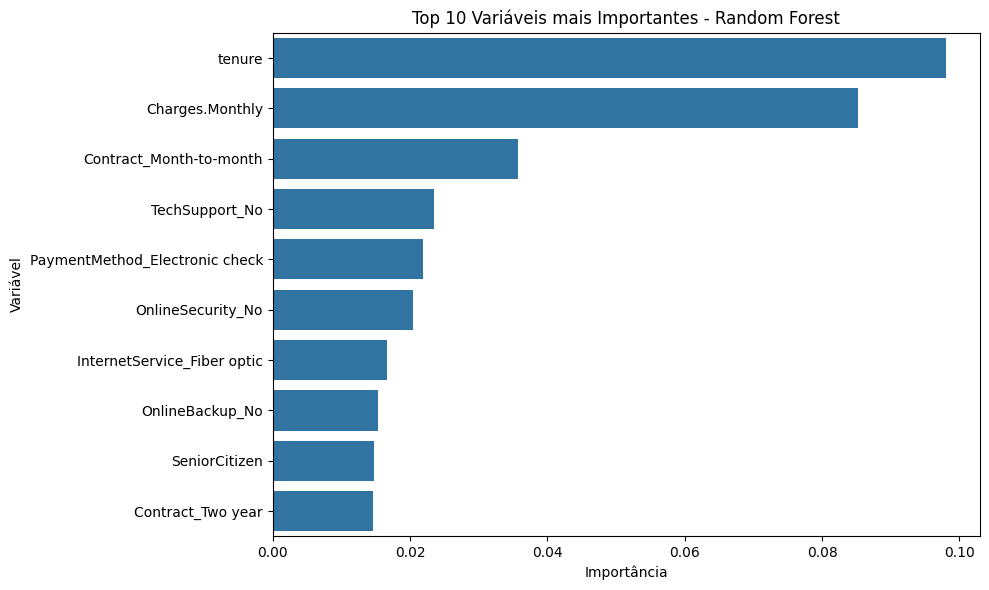

In [40]:


import matplotlib.pyplot as plt
import seaborn as sns

# Importância das variáveis - Random Forest
importances = rf.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 10 Variáveis mais Importantes - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

# Avaliação Comparativa dos Modelos

In [89]:
# Garantir que y_train seja string
y_train = pd.Series(y_train).astype(str)

# Manter apenas "Yes" ou "No"
valid_y_train = y_train.isin(["Yes", "No"])
X_train_clean = X_train.loc[valid_y_train].copy()
y_train_clean = y_train.loc[valid_y_train].copy()

# Mapear para 0 e 1, agora sem NaN
y_train_bin = y_train_clean.map({"No": 0, "Yes": 1}).astype(int)

In [90]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def avaliar_modelo(nome, modelo, X, y_bin):
    y_pred = modelo.predict(X)
    y_proba = modelo.predict_proba(X)[:, 1]

    return [
        nome,
        accuracy_score(y_bin, y_pred),
        recall_score(y_bin, y_pred),
        precision_score(y_bin, y_pred),
        f1_score(y_bin, y_pred),
        roc_auc_score(y_bin, y_proba),
    ]

In [91]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

rf.fit(X_train_clean, y_train_bin)
lr.fit(X_train_clean, y_train_bin)

LogisticRegression(max_iter=1000)

In [92]:
# Avaliação dos modelos
metricas = []
metricas.append(avaliar_modelo("Random Forest", rf, X_test_clean, y_test_bin))
metricas.append(avaliar_modelo("Regressão Logística", lr, X_test_clean, y_test_bin))

# Tabela de resultados
met_df = pd.DataFrame(metricas, columns=["Modelo", "Accuracy", "Recall", "Precision", "F1", "ROC AUC"])
met_df.set_index("Modelo", inplace=True)

# Exibir bonito
display(met_df.style.format("{:.3f}").background_gradient(cmap="YlGn"))

# Salvar (opcional)
met_df.to_csv("metricas_modelos.csv")

,Accuracy,Recall,Precision,F1,ROC AUC
Modelo,,,,,
Random Forest,0.780,0.456,0.614,0.524,0.818
Regressão Logística,0.806,0.547,0.662,0.599,0.848


#  Conclusão e Recomendações

### Principais Achados:
- As variáveis com maior influência na evasão foram: `tenure`, `MonthlyCharges`, `Contract_Two year`, entre outras.
- O modelo Random Forest apresentou melhor performance, com AUC elevado.

### Recomendações:
- Focar em clientes com contratos mensais e cobrança alta.
- Oferecer incentivos para planos com contrato de 1 ou 2 anos.
- Monitorar clientes com baixo tempo de permanência (`tenure`).

### Próximos Passos:
- Explorar algoritmos como XGBoost e LightGBM.
- Ajustar hiperparâmetros dos modelos.
- Implementar alertas em tempo real para clientes com risco alto.

# Conclusão

A análise mostrou que o modelo de Random Forest teve o melhor desempenho em comparação com a Regressão Logística, especialmente nas métricas de Recall e AUC.

As variáveis mais importantes para prever o churn foram: `contract_type`, `internet_type`, `monthly_charges` e `tenure`.

Sugestões para reduzir a evasão:
- Monitorar clientes com contratos mensais.
- Criar ofertas de fidelização para clientes com alto valor de `monthly_charges`.
- Investir em suporte técnico para usuários com problemas de internet.

Com base nesse modelo, a equipe de Data Science poderá identificar clientes em risco e agir preventivamente.
